# Three-Dimensional ECM Plots
Make 3D plots of ALHIC1901 228_4 and 230_4

## Import Data

In [45]:
# general
import numpy as np
import pandas as pd
from tqdm import tqdm

# plotting
#%matplotlib tk
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# my functions/classes
import sys
sys.path.append("../core_scripts/")
from ECMclass import ECM
from ECMclass import core_section

## Setup

In [46]:
# Set filepaths

path_to_data = '../../data/ecm/'
path_to_figures = '../../../figures/'

In [47]:
# smoothing window
window = 10

## Load Data

In [48]:
# Load metadata
meta = pd.read_csv(path_to_data + 'metadata.csv')
meta.head()

,core,time,section,face,ACorDC,Y_left,Y_right,AC_edgespace,DC_edgespace
0,alhic1901,cmc1,230_4,t,DC,-5.080,206.763,15,10
1,alhic1901,cmc1,230_4,l,DC,70.404,170.096,15,10
2,alhic1901,cmc1,228_4,t,DC,-10.000,192.000,15,10
3,alhic1901,cmc1,228_4,l,AC,63.881,166.250,15,10
4,alhic1901,cmc1,228_4,l,DC,65.891,149.177,15,10


In [49]:
# Load ECM data

data = []
cores = []
sections = []
faces = []
ACorDCs = []
for index, row in tqdm(meta.iterrows(), total=len(meta), desc="Processing data"):
    
    core = row['core']
        
    section = row['section']
    face = row['face']
    ACorDC = row['ACorDC']

    data_item = ECM(core,section,face,ACorDC)
    print("Reading "+core+", section "+section+'-'+face+'-'+ACorDC)
    
    data_item.rem_ends(15)
    data_item.smooth(window)
    data.append(data_item)
    
    cores.append(core)
    sections.append(section)
    faces.append(face)
    ACorDCs.append(ACorDC)

Processing data:   8%|▊         | 1/13 [00:00<00:01,  6.67it/s]

Reading alhic1901, section 230_4-t-DC
Reading alhic1901, section 230_4-l-DC


Processing data:  23%|██▎       | 3/13 [00:00<00:01,  8.78it/s]

Reading alhic1901, section 228_4-t-DC
Reading alhic1901, section 228_4-l-AC


Processing data:  31%|███       | 4/13 [00:00<00:01,  7.85it/s]

Reading alhic1901, section 228_4-l-DC
Reading alhic1901, section 230_4-l-AC


Processing data:  46%|████▌     | 6/13 [00:00<00:00,  8.10it/s]

Reading alhic1901, section 230_4-t-AC


Processing data:  54%|█████▍    | 7/13 [00:01<00:02,  2.99it/s]

Reading alhic1901, section 230_4-r-DC
Reading alhic1901, section 230_4-r-AC


Processing data:  69%|██████▉   | 9/13 [00:01<00:00,  4.20it/s]

Reading alhic1901, section 228_4-r-DC
Reading alhic1901, section 228_4-r-AC


Processing data:  85%|████████▍ | 11/13 [00:02<00:00,  5.25it/s]

Reading alhic1901, section 228_4-o-AC


Processing data:  92%|█████████▏| 12/13 [00:02<00:00,  4.90it/s]

Reading alhic1901, section 228_4-t-AC


Processing data: 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]


In [50]:
# Put ECM data into core_section structure

s228_4 = core_section('228_4','alhic1901','AC',data,sections,faces,cores,ACorDCs)
s230_4 = core_section('230_4','alhic1901','AC',data,sections,faces,cores,ACorDCs)

# place in 3D space
for s in [s228_4,s230_4]:
    s.add_3d_coords()

In [51]:
print(s228_4.left.y_left)
print(s228_4.left.y_right)

63.881
166.25


## Make 3D Plot




In [52]:
# setup

# colormap
cmap = matplotlib.colormaps['Spectral']

# fontsize
fsz = 6

In [53]:
# make function to draw outline
def draw_outline(radius, d_min, d_max, ax, leftorright):
    
    angle_resolution = 50
    
    # Generate points in the xz-plane (side surface)
    if leftorright=='left':
        theta = np.linspace(1*np.pi/2, 2*np.pi / 2, angle_resolution)
    elif leftorright=='right':
        theta = np.linspace(0*np.pi/2, 1*np.pi / 2, angle_resolution)
    else:
        print("Error - invalid input to drawoutline function")
        
    x = radius * np.cos(theta)
    z = radius * np.sin(theta)
    
    # set sign of outlying points
    if leftorright=='left':
        r=-radius
    elif leftorright=='right':
        r=radius
    else:
        print("Error - invalid input to drawoutline function")


    
    # Plot the ront side curve
    ax.plot(x, d_max * np.ones_like(x), z, color='k')
    # Plot the back side curve
    ax.plot(x, d_min*np.ones_like(x), z, color='k')
    # Plot the Bottom Edge
    ax.plot([0,0],[d_min, d_max],[radius,radius],color='k')
    # Plot the Top Edge
    ax.plot([0,0],[d_min, d_max],[0,0],color='k')
    # Plot the Ouside Edge
    ax.plot([r,r],[d_min, d_max],[0,0],color='k')
    # plot the front edge
    ax.plot([r,0],[d_min, d_min],[0,0],color='k')
    # plot the back edge
    ax.plot([r,0],[d_max, d_max],[0,0],color='k')
    # plot the front upright edge
    ax.plot([0,0],[d_max, d_max],[0,radius],color='k')
    # plot the back upright edge
    ax.plot([0,0],[d_min, d_min],[0,radius],color='k')

0.1018965
Running face t


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

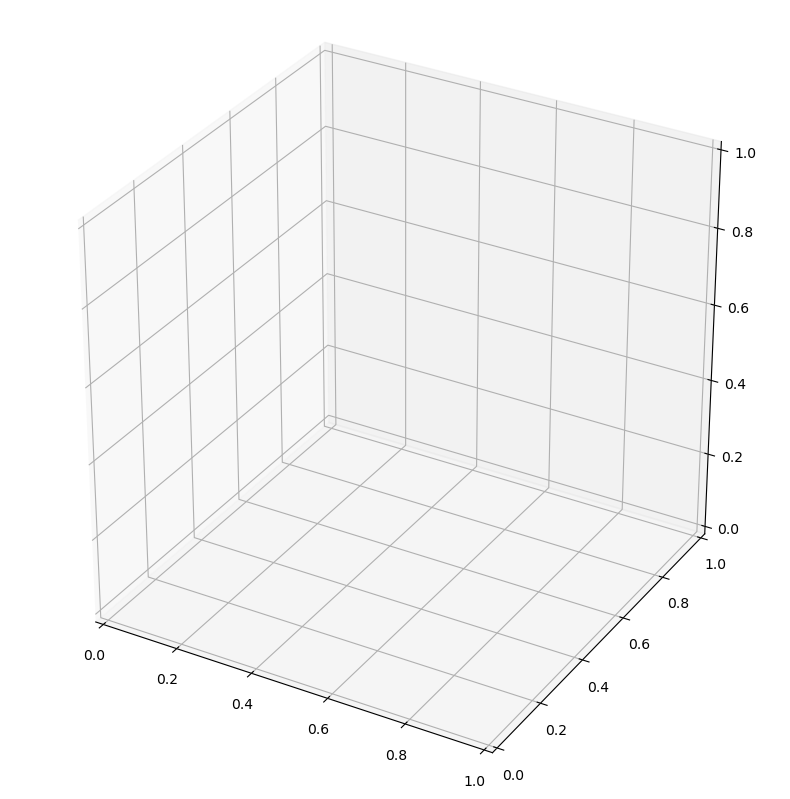

In [ ]:
# loop through sections
for s in [s228_4,s230_4]:

    # make colorscale
    meas_all = np.concatenate((s.top.meas, s.left.meas, s.right.meas)) 
    pltmin = np.percentile(meas_all,10)
    pltmax = np.percentile(meas_all,90)
    rescale = lambda k: (k-pltmin) /  (pltmax-pltmin)

    # Define the parameters for the quarter cylinder
    radius = max([max(abs(s.top.x_3d)),max(abs(s.left.y_3d)),max(abs(s.right.y_3d))])
    print(radius)

    d_min = min([min(s.left.depth_s),
                  min(s.top.depth_s),
                  min(s.right.depth_s)])
    d_max = max([max(s.left.depth_s),
                  max(s.top.depth_s),
                  max(s.right.depth_s)])

    for side in ['left']:

        # make figure
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_box_aspect([1,1,1])

        # let's plot ECM data
        if side == 'right':
            faces = [s.top,s.right]
            face_names = ['t','r']
        else:
            faces = [s.top,s.left]
            face_names = ['t','l']

        # loop through and plot each face
        for f,n in zip(faces,face_names):

            print("Running face "+n)

            for i in range(len(f.y_vec)):


                
                meas = f.meas_s[f.y_s==f.y_vec[i]]
                depth = f.depth_s[f.y_s==f.y_vec[i]]
                x_3d = f.x_3d[f.y_s==f.y_vec[i]]
                y_3d = f.y_3d[f.y_s==f.y_vec[i]]

                # if n == 't' and side == 'right' and x_3d[0]<0:
                #     break
                # if n == 't' and side == 'left' and x_3d[0]>0:
                #     break

                if not n == 't' and (side == 'left' and x_3d[0] > 0) or (side):
                    
                    if n=='t':
                        z = [0,0,0,0]
                    else:
                        x=[0,0,0,0]
                        
                    for j in range(len(meas)-1):

                        if n=='t':
                            x = [x_3d[j]-f.y_space/2000,x_3d[j]-f.y_space/2000,x_3d[j]+f.y_space/2000,x_3d[j]+f.y_space/2000]
                        else:
                            z= [y_3d[j]-f.y_space/2000,y_3d[j]-f.y_space/2000,y_3d[j]+f.y_space/2000,y_3d[j]+f.y_space/2000]

                        y = [depth[j],depth[j+1],depth[j+1],depth[j]]

                        verts = [list(zip(x,y,z))]
                        collection = Poly3DCollection(verts, alpha=1,antialiased=False)
                        face_color = cmap(rescale(meas[j]))
                        collection.set_facecolor(face_color)
                        ax.add_collection3d(collection)

                        #if j == 0 and i == 0:
                        #    print(verts)
                        #    ax.add_collection3d(collection)

                        if j%1000 == 0:
                            print(verts)

        # set labels
        ax.set_ylabel('Depth (m)',fontsize=fsz,labelpad=60)
        ax.set_xlabel('X-Axis (m)',fontsize=fsz, labelpad=10)
        ax.set_zlabel('Y-Axis (m)',fontsize=fsz, labelpad=20,rotation=0)

        ax.tick_params(axis='z', pad=10)
        ax.tick_params(axis='y', pad=20)

        # set axis limits
        ax.set_zlim(-0.001,radius)
        ax.set_ylim(d_min,d_max)

        # plot housekeeping
        fig.suptitle(s.core + ' ' + s.section + ' ' + side)

        # draw outline
        draw_outline(radius,d_min,d_max,ax,side)

        

        # set perspective
        if side=='left':
            ax.view_init(elev=-20, azim=-70,roll=0)
            ax.set_xlim(-radius,0.001) 
        if side=='right':
            ax.view_init(elev=-20, azim=-110,roll=0)
            ax.set_xlim(-0.001,radius)

        # set to scale
        ax.set_aspect('equal')

    plt.show()

    

In [83]:
x_3d = s228_4.top.x_3d[s228_4.top.y_s==s228_4.top.y_vec[12]]
x_3d[0]

-0.018103499999999998

In [56]:
s228_4.top.y_right

218.793

In [57]:
s228_4.top.y_left

-15.0

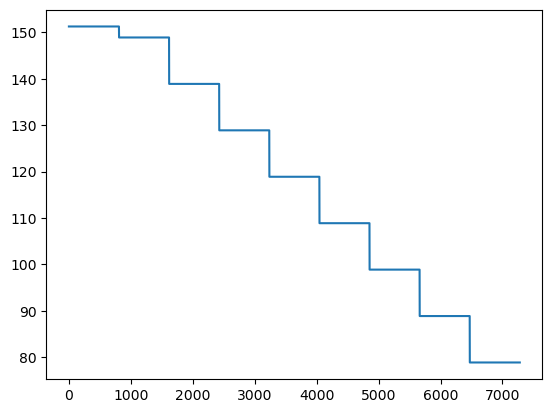

In [65]:
plt.plot(s228_4.left.y_s)

In [77]:
s228_4.top.x_3d

array([-0.1018965, -0.1018965, -0.1018965, ...,  0.1018965,  0.1018965,
        0.1018965])

In [60]:
s228_4.top.meas

array([1.758880e-08, 1.747470e-08, 1.772855e-08, ..., 2.197460e-08,
       2.209875e-08, 2.207490e-08])

In [61]:
s228_4.top.button_s

array([0, 0, 0, ..., 0, 0, 0])